Text(0, 0.5, 'feature 1')

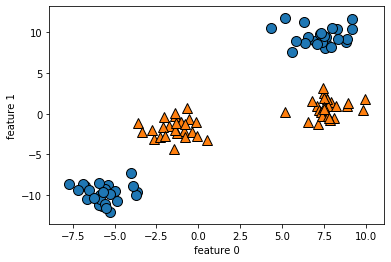

In [5]:
## SVM(Support Vector Machine, 커널서포트백터머신) 에 대해서 알아보자 
## SVM.pdf참고

'''SVM
선형 모델을 유연하게 만드는 방법: 특성끼리 곱하거나 특성을 거듭제곱하는 식으로 
새로운 특성을 추가하여 단순한 초평면으로 정의되지 않는 더 복잡한 모델을 만들 수 
있도록 확장한 것 
'''

# 선형적으로 분류되지 않는 클래스를 가진 이진 데이터셋
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import mglearn

X, y = make_blobs(centers=4, random_state=8)
y=y%2
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
# 둘을 명확하게 구분하는 하나의 선형회귀선을 찾기 어렵다 
# 입체적으로 회전시켜서 찾는 다면 찾을 수 있다.
# (만약 주황색이 파란색보다 조금 위에 있다면?) => 특성추가로 다차원化 

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'feature 1')

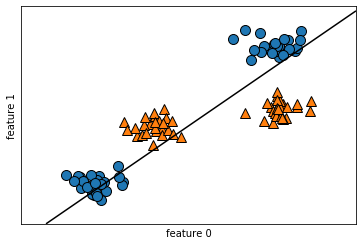

In [14]:
# 분류를 위한 선형 모델은 직선으로만 데이터 포인트를 나눕니다. 

from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
#분류를 위한 선형 모델은 직선으로만 데이터 포인트를 나누므로 
#올바르게 분류하지 못하는 것을 확인 

Text(0.5, 0, 'feature1 ** 2')

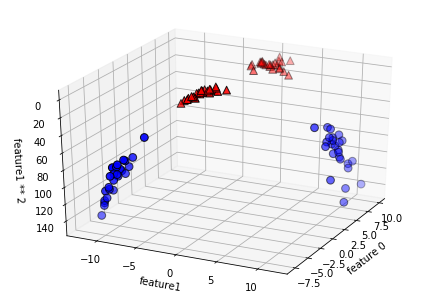

In [15]:
# 두 번째 특성을 제곱한 특성으로 새로운 특성을 추가해서 입력 특성을 확장 
import numpy as np
from mpl_toolkits.mplot3d import Axes3D   

#conda install basemap ,  pip install -U matplotlib(최신화)
X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)

# y == 0인 포인트를 먼저 그리고 그다음 y == 1인 포인트를 그립니다.
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], 
           X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], 
           X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature 0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

  

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature 1 ** 2')

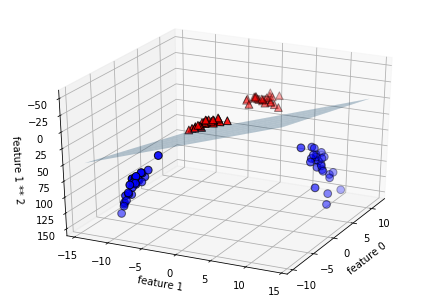

In [20]:
#선형 모델과 3차원 공간의 평면을 사용해 두 클래스를 분류
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature 1 ** 2")

Text(0, 0.5, 'feature 1')

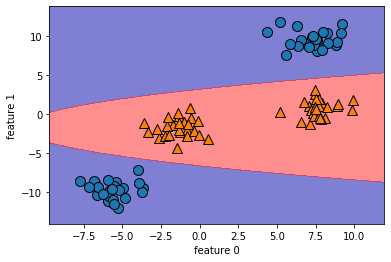

In [21]:
#선형SVM 모델은 직선이 아닌 타원에 가까운 분류 경계를 찾아줌
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), 
                                            YY.ravel(), 
                                            ZZ.ravel()])
plt.contourf(XX, YY, 
             dec.reshape(XX.shape), 
             levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

In [ ]:
# 데이터를 고차원 공간에 매핑하는 데 사용하는 방법
# 1. 다항식 커널: 원래 특성의 가능한 조합을 지정된 차수까지 모두 계산 
# (예: 특성1**2 + 특성**5) 
# 2. 가우시안 커널: 차원이 무한한 특성 곤간에 매핑되도록 계산, 모든 차수의 모든
#   다항식을 고려한다. 


Text(0.5, 0, 'feature 1')

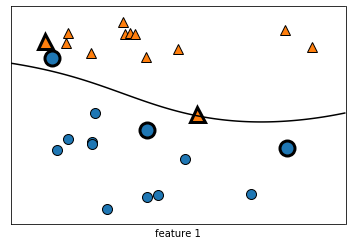

In [23]:
# 새로운 데이터에 대한 예측은 각 서포트 백터와의 거리를 측정합니다.

# 두 개의 클래스를 가진 2차원 데이터셋에 SVM으로 학습
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)   
#gamma는 가우시안 커널의 폭을 제어하는 매개변수
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:,0], X[:, 1], y)

sv = svm.support_vectors_  #서포트 벡트들
sv_labels = svm.dual_coef_.ravel() > 0   
# dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됩니다.
mglearn.discrete_scatter(sv[:,0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("feature 0")
plt.xlabel("feature 1")

In [24]:
'''선형 분류기 훈련 
 초평면은 n차원 공간에 있는 n-1 부분 공간으로 정의합니다.
 SVM은 훈련 데이터를 분류하기 위해 클래스 사이의 마진을 최대화하는 초평면을 찾습니다.
 사이킷런의 LinearSVC는 클래스 사이 마진이 최대화되는 초평면을 찾습니다. (초평면은 새로운 샘플을 분류하기
위한 결정 경계입니다.)
 초평면의 마진을 최대화하는 SVC와 분류 오차를 최소화하는 것 사이에 균형을 잡아야 합니다.
 SVC 모델의 매개변수 C는 잘못 분류된 데이터 포인트에 부여하는 페널티입니다.
 C가 작으면 분류기는 잘못 분류된 데이터 포인트를 허용합니다
 C가 크면 분류기는 잘못 분류된 데이터에 큰 페널티를 부과합니다.
'''
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris() # 데이터 로드
features = iris.data[:100,:2] #두 개의 클래스와 두 개의 특성만 선택
target = iris.target[:100]

scaler = StandardScaler() # 특성 표준화
features_standardized = scaler.fit_transform(features)
svc = LinearSVC(C=1.0) # 서포트 벡터 분류기 생성
model = svc.fit(features_standardized, target) # 모델 훈련

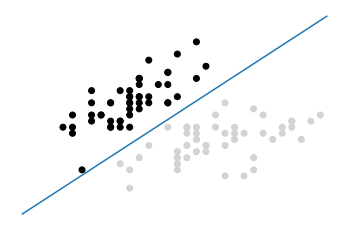

array([-6.84225834])

In [25]:
'''
 LinearSVC 클래스는 예측 확률을 제공하지는 않지만 decision_function()를 사용해 분류에 대한 신뢰도를 확인할
수 있습니다.
'''
from matplotlib import pyplot as plt
# 클래스를 색으로 구분한 산점도를 그립니다.
color = ["black" if c == 0 else "lightgrey" for c in target]
plt.scatter(features_standardized[:,0], features_standardized[:,1], c=color)
w = svc.coef_[0] # 초평면을 만듭니다.
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]
plt.plot(xx, yy) # 초평면을 그립니다.
plt.axis("off"), plt.show();
new_observation = [[ -2, 3]] # 새로운 샘플을 만듭니다.
svc.predict(new_observation) # 새로운 샘플의 클래스를 예측
svc.decision_function(new_observation)

In [27]:
'''
커널을 사용해 선형적으로 구분되지 않는 클래스 다루기
 클래스가 선형적으로 구분되지 않을 때 비선형 결정 경계를 만들기 위해 커널 함수를 사용한 서포트 벡터 머신으
로 훈련합니다.
'''
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

np.random.seed(0) # 랜덤 시드를 지정
features = np.random.randn(200, 2) # 두 개의 특성을 만듭니다.

# XOR 연산(이것이 무엇인지 알 필요는 없습니다)을 사용하여
# 선형적으로 구분할 수 없는 클래스를 만듭니다.
target_xor = np.logical_xor(features[:, 0] > 0, features[:, 1] > 0)
target = np.where(target_xor, 0, 1)

# 방사 기저 함수 커널을 사용한 서포트 벡터 머신을 만듭니다.
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)

model = svc.fit(features, target) # 분류기 훈련

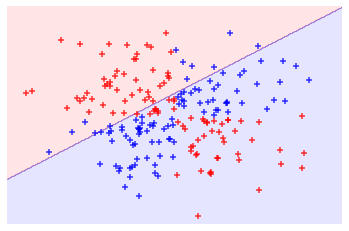

In [30]:
# 샘플과 결정 경계를 그립니다.
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap(("red", "blue"))
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap.colors[idx],
                    marker="+", label=cl)
    
# 선형 커널을 사용한 서포트 벡터 분류기를 만듭니다.
svc_linear = SVC(kernel="linear", random_state=0, C=1)
svc_linear.fit(features, target) # 모델 훈련

# 샘플과 초평면을 그립니다.
plot_decision_regions(features, target, classifier=svc_linear) 
plt.axis("off"), plt.show();

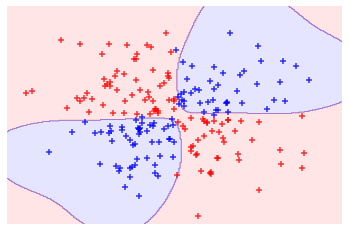

In [31]:
# 방사 기지 함수 커널을  사용한 서포트 벡터 분류기를 만듭니다.
svc_linear = SVC(kernel="rbf", random_state=0, gamma=1, C=1)
svc_linear.fit(features, target) # 모델 훈련

#분류기를 훈련합니다. 
model = svc.fit(features, target)

# 샘플과 초평면을 그립니다.
plot_decision_regions(features, target, classifier=svc_linear) 
plt.axis("off"), plt.show();

In [33]:
'''
예측 확률 계산
 사이킷런의 SVC 클래스를 사용할 때 probability=True로 지정하여 모델을 훈련하면 predict_proba()에서 보정된 확
률을 확인할 수 있습니다.
'''
#iris 데이터 활용 

from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
iris = datasets.load_iris() # 데이터 로드
features = iris.data
target = iris.target

scaler = StandardScaler() # 특성 표준화
features_standardized = scaler.fit_transform(features)

# 서포트 벡터 분류기 객체 생성
svc = SVC(kernel="linear", probability=True, random_state=0)
model = svc.fit(features_standardized, target) # 분류기 훈련
new_observation = [[.4, .4, .4, .4]] #New Sample Data
model.predict_proba(new_observation) # 예측 확률 확인



array([[0.00582525, 0.96725691, 0.02691783]])

In [35]:
'''
서포트 벡터 식별
 사이킷런의 SVC를 훈련하고 support_vectors_를 사용하여 모델에 있는 서포트 벡터를 식별할 수 있습니다.
 support_ 속성을 사용하여 서포트 벡터의 인덱스를 확인할 수 있습니다.
'''
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris() #데이터 로드
features = iris.data[:100,:] #두 개의 클래스만 선택
target = iris.target[:100]

scaler = StandardScaler() # 특성을 표준화
features_standardized = scaler.fit_transform(features)

svc = SVC(kernel="linear", random_state=0) # 서포트 벡터 분류기 객체 생성
model = svc.fit(features_standardized, target) # 분류기 훈련

print(model.support_vectors_) # 서포트 벡터를 확인(4개)
print(model.support_) #4개 서포트 벡터의 인덱스값 출력 

[[-0.5810659   0.42196824 -0.80497402 -0.50860702]
 [-1.52079513 -1.67737625 -1.08231219 -0.86427627]
 [-0.89430898 -1.4674418   0.30437864  0.38056609]
 [-0.5810659  -1.25750735  0.09637501  0.55840072]]
[23 41 57 98]


In [37]:
'''
불균형한 클래스 다루기
 class_weight 매개변수를 사용하여 작은 클래스를 잘못 분류했을 때 페널티를 증가시킵니다.
'''
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris() #데이터 로드
features = iris.data[:100,:] #두 개의 클래스만 선택
target = iris.target[:100]
features = features[40:,:] # 처음 40개 샘플을 제거
target = target[40:] #불균형한 클래스를 만듭니다.

# 타깃 벡터에서 0이 아닌 클래스는 모두 1로 만듭니다.
target = np.where((target == 0), 0, 1)
scaler = StandardScaler() # 특성을 표준화
features_standardized = scaler.fit_transform(features)

svc = SVC(kernel="linear", class_weight="balanced", C=1.0, random_state=0)
model = svc.fit(features_standardized, target) # 분류기 훈련

print(model.support_vectors_) # 서포트 벡터를 확인(4개)
print(model.support_) #4개 서포트 벡터의 인덱스값 출력 


[[-2.0296198  -1.43246061 -2.21674172 -1.99211234]
 [-1.22421511  1.61893477 -1.95019963 -1.29176034]
 [-1.38529605 -1.17817766 -0.43979445 -0.35795769]
 [-1.06313418 -0.92389471 -0.70633654 -0.12450702]]
[ 1  3 17 58]


In [38]:
'''연습문제
titanic 데이터 분류 분석 수행을 SVM으로 분류 분석 수행하고
평가 지표 비교  
'''
import pandas as pd
import seaborn as sns

df  = sns.load_dataset('titanic')
print(df.head())
print(df.info())

#deck열(NaN이 많은)삭제, embarked와 embark_town열의 의미가 동일하므로 embark_town 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)
print(rdf.columns.values)

#age열에 NaN 데이터를 가지는 행 삭제 (고유값으로 확인 가능)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)
print(len(rdf))

#embarked 열에 NaN 값을 가장 많은 승선도시 값으로 치환
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
print(most_freq)
#print(rdf.describe(include='all'))
rdf['embarked'].fillna(most_freq, inplace=True)

#분석에 활용할 특성 선택
ndf = rdf[['survived', 'pclass', 'sex' ,'age' ,'sibsp' ,'parch',  'embarked' ]]
print(ndf.head())

# 범주형 데이터를 정수형으로 변환(one hot encoding) - 'sex', 'embarked' 
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)
print(ndf.head())

#특성(독립변수)과 타겟(종속변수) 분리
X=ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 'town_C', 'town_Q', 'town_S']]   
y=ndf['survived']   

#특성(독립변수) 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train,  test dataset 분리 (7: 3)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age        

In [39]:
#학습시작
svm_model = SVC(kernel='rbf') #모형 객체 생성 
svm_model.fit(X_train, y_train)
y_hat = svm_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])
print("\n")

from sklearn import metrics 
svm_matrix = metrics.confusion_matrix(y_test, y_hat)

#모형 성능 평가 - Confusion Matirx 계산 
print(svm_matrix)
print('\n')

#모형 성능 평가 - 평가 지표 계산 
svm_report = metrics.classification_report(y_test, y_hat)
print(svm_report)

[0 0 1 0 0 0 1 0 0 0]
[0 0 1 0 0 1 1 1 0 0]


[[120   5]
 [ 35  55]]


              precision    recall  f1-score   support

           0       0.77      0.96      0.86       125
           1       0.92      0.61      0.73        90

    accuracy                           0.81       215
   macro avg       0.85      0.79      0.80       215
weighted avg       0.83      0.81      0.81       215

